In [53]:
import warnings as w
w.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [54]:
df = pd.read_csv('training_dataset.csv')

In [55]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [56]:
df.shape

(891, 12)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [58]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [59]:
df.Age = df.Age.fillna(df.Age.mode()[0])

In [60]:
df.Sex.value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [61]:
Family = pd.Series(df.SibSp + df.Parch, name='Family')
df = pd.concat([df,Family],axis=1)

In [62]:
df.drop(['PassengerId','Cabin','Name','Ticket','Embarked','SibSp','Parch'],axis=1,inplace=True)

In [63]:
from sklearn.preprocessing import LabelEncoder

In [64]:
encoder = LabelEncoder()
pickle.dump(encoder,open('encoder.pkl','wb'))

In [65]:
df.Sex = encoder.fit_transform(df.Sex)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    float64
 4   Fare      891 non-null    float64
 5   Family    891 non-null    int64  
dtypes: float64(2), int32(1), int64(3)
memory usage: 38.4 KB


In [67]:
df.corr(method='spearman')['Survived']

Survived    1.000000
Pclass     -0.339668
Sex        -0.543351
Age        -0.023764
Fare        0.323736
Family      0.165463
Name: Survived, dtype: float64

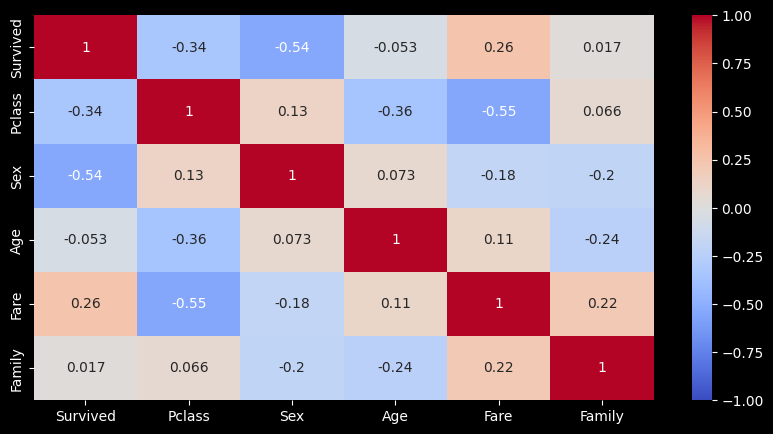

In [68]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',vmin=-1,vmax=1)
plt.show()

In [69]:
X = df.drop('Survived',axis=1)
y = df.Survived

In [70]:
X.head()

,Pclass,Sex,Age,Fare,Family
0,3,1,22.0,7.2500,1
1,1,0,38.0,71.2833,1
2,3,0,26.0,7.9250,0
3,1,0,35.0,53.1000,1
4,3,1,35.0,8.0500,0


In [71]:
from sklearn.model_selection import train_test_split
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.2,random_state=42)

In [72]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)

In [73]:
pickle.dump(scaler,open('scaling.pkl','wb'))

In [74]:
X_train.shape,y_train.shape,X_valid.shape,y_valid.shape

((712, 5), (712,), (179, 5), (179,))

In [75]:
from sklearn.ensemble import RandomForestClassifier
ml_model = RandomForestClassifier()

In [76]:
ml_model.fit(X_train,y_train)

RandomForestClassifier()

In [77]:
ml_model.score(X_valid,y_valid)

0.8156424581005587

In [78]:
pickle.dump(ml_model,open('classifier.pkl','wb'))